In [ ]:
r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLWHI/y-2020")
soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
whipsnakes20_dfs = pd.read_html(soup.prettify())
whipsnakes20_scoring_df = whipsnakes_dfs[0]
whipsnakes20_scoring_df['Team'] = 'whipsnakes'


whipsnakes20_goalkeep_df = whipsnakes_dfs[1]
display(whipsnakes_scoring_df)

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLWAT/y-2020")
team = "waterdogs"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
waterdogs20_dfs = pd.read_html(soup.prettify())

waterdogs20_scoring_df = waterdogs20_dfs[0]
waterdogs20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLRED/y-2020")
team = "redwoods"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
redwoods20_dfs = pd.read_html(soup.prettify())

redwoods20_scoring_df = redwoods20_dfs[0]
redwoods20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLCHR/y-2020")
team = "chrome"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
chrome20_dfs = pd.read_html(soup.prettify())

chrome20_scoring_df = chrome20_dfs[0]
chrome20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLCHA/y-2020")
team = "chaos"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
chaos20_dfs = pd.read_html(soup.prettify())

chaos20_scoring_df = chaos20_dfs[0]
chaos20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLATL/y-2020")
soup = BeautifulSoup(r.content, 'html.parser')
atlas20_dfs = pd.read_html(soup.prettify())
atlas20_scoring_df = atlas20_dfs[0]
atlas20_scoring_df['Team'] = "atlas"

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLARC/y-2020")
soup = BeautifulSoup(r.content, 'html.parser')
archers20_dfs = pd.read_html(soup.prettify())
archers20_scoring_df = archers20_dfs[0]
archers20_scoring_df['Team'] = "archers"

# How to Win Premier Lacrosse League Games

By John Perret

## Introduction

The premier lacrosse league is a relatively knew professional sports league. The Whipsnakes Lacrosse Club has won the championship both seasons. I'd like to see if there is a data science method to find out how they score goals stop the other team from scoring and then win games.

There are only seven teams and two seasons, so the dataset is very small compared to other sports however the processes used will scale when more data becomes avaliable

## Data Scrapping

First we'll import all the libraries we'll need.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model

In [49]:
# initialize some constants
team_colors= {"Archers LC" : "#224279", "Atlas LC" : "#0ea2c0", "Chaos LC" : "#ed4849", "Chrome LC" : "#f3609e", "Redwoods LC" : "#483633", "Waterdogs LC" : "#978cd8", "Whipsnakes LC" : "#58c4b2"}
SEASONS = [2019, 2020] # as more seasons are held add to the list

## Source
There are multiple pages that data is being scrapped from. They are all from [statscrews.com 2020 Premier Lacrosse League Data](https://www.statscrew.com/lacrosse/l-PLL/y-2020).

Stats crew contains data for many different professional sports leagues for different sports.

First we will gather on all the players in all the season. This requires going to each team's page for each year and collecting the table on the page.

Since we can select all values in the dataframe by the team column there is no need to save dataframes for each team.

In [39]:
teams_dic = {"Archers LC" : "t-PLLARC", "Atlas LC" : "t-PLLATL", "Chaos LC" : "t-PLLCHA", "Chrome LC" : "t-PLLCHR", "Redwoods LC" : "t-PLLRED", "Waterdogs LC" : "t-PLLWAT", "Whipsnakes LC" : "t-PLLWHI"}
teams = teams_dic.keys()
combined20_scoring_df = pd.DataFrame()

for year in SEASONS:
    for name in teams_dic:
        r = req.get(f"https://www.statscrew.com/lacrosse/stats/{teams_dic[name]}/y-{year}")
        soup = BeautifulSoup(r.content, 'html.parser')
        new_df = pd.read_html(soup.prettify())[0]
        new_df['team'] = name
        new_df['year'] = year
        combined20_scoring_df = pd.concat([combined20_scoring_df, new_df],ignore_index=True)

combined20_scoring_df

,Player,Pos,GP,G,A,Pts,PIM,PPG,SHG,GWG,...,S%,SG%,GB,TOC,CTO,FO,FW,FO%,team,year
0,Tom Schreiber,M,10.0,17.0,18.0,37.0,NaN,0.0,0.0,0.0,...,28.8,58.6,9.0,22.0,1.0,0.0,0.0,NaN,Archers LC,2019
1,Marcus Holman,A,10.0,23.0,7.0,32.0,NaN,0.0,0.0,0.0,...,31.1,53.5,17.0,19.0,0.0,0.0,0.0,NaN,Archers LC,2019
2,Will Manny,A,10.0,22.0,7.0,30.0,NaN,0.0,0.0,0.0,...,29.7,44.0,7.0,20.0,1.0,0.0,0.0,NaN,Archers LC,2019
3,Ben McIntosh,M,10.0,11.0,2.0,13.0,NaN,0.0,0.0,0.0,...,25.0,40.7,7.0,7.0,0.0,0.0,0.0,NaN,Archers LC,2019
4,Christian Cuccinello,A,8.0,8.0,4.0,12.0,NaN,0.0,0.0,0.0,...,28.6,47.1,10.0,7.0,0.0,0.0,0.0,NaN,Archers LC,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Joe McCallion,M,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,1.0,0.0,11.0,4.0,36.4,Whipsnakes LC,2020
325,Jacob Stover,G,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,Whipsnakes LC,2020
326,Tyler Warner,M,6.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,...,0.0,0.0,16.0,2.0,0.0,0.0,0.0,NaN,Whipsnakes LC,2020
327,Jake Bernhardt,"M,F",6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,7.0,0.0,0.0,NaN,Whipsnakes LC,2020


| Column Title | Explanation |
| ----------- | ----------- |
| Pos | Position |
| GP | Games Played |
| G | Goals |
| A | Assists |
| Pts | Points: goals + assists |
| PIM | Penalties in minutes |
| PPG | Power Play Goals |
| SHG | Short Hand Goals |
| GWG | Game Winning Goals |
| Shts | Shots |
| SOG | Shots On Goal |
| S% | Shooting Percentage |
| SG% | Shots On Goal Percentage |
| GB | Ground Balls |
| TOC | Turnovers Committed |
| CTO | Caused Turnovers |
| FO | Faceoffs |
| FW | Faceoffs Won |
| FO% | Faceoff Win Percentage |
| Team | Team |
| year | Year |

Next we will collecting the regular season standings. The 2020 season for example can be found [here](https://www.statscrew.com/lacrosse/standings/l-PLL/y-2020).

In [50]:
standings = pd.DataFrame()
for year in SEASONS:
    r = req.get(f"https://www.statscrew.com/lacrosse/standings/l-PLL/y-{year}")
    soup = BeautifulSoup(r.content, 'html.parser')
    s = pd.read_html(soup.prettify())[0]
    s['year'] = year
    s.drop("Unnamed: 5", axis=1, inplace=True)
    s.drop("Unnamed: 6", axis=1, inplace=True)
    standings = pd.concat([standings, s], ignore_index=True)
standings

,Team,W,L,GF,GA,year
0,Chaos LC,7,3,118,126,2019
1,Whipsnakes LC,6,4,116,109,2019
2,Archers LC,5,5,105,100,2019
3,Redwoods LC,5,5,112,106,2019
4,Atlas LC,5,5,117,122,2019
5,Chrome LC,2,8,120,125,2019
6,Whipsnakes LC,6,0,82,51,2020
7,Archers LC,4,2,64,68,2020
8,Chrome LC,3,2,64,64,2020
9,Redwoods LC,3,3,62,63,2020


| Column Title | Explanation |
| ----------- | ----------- |
| Team | Team |
| W | Wins |
| L | Losses |
| GF | Goals For |
| GA | Goals Against |
| year | Year |

For the most the data is already tidy so we can move into exploratory analysis

# Potential Questions
is GF or GA a better guiess for num wins
could make a really complicated linear regression with all the datapoints to see what wins games

## What is more relevant to wins? Goals for or goals against

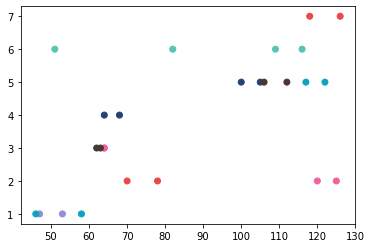

In [46]:
plt.scatter(standings.GF, standings.W, color=[team_colors[t] for t in standings.Team], label = standings.Team)
plt.scatter(standings.GA, standings.W, color=[team_colors[t] for t in standings.Team], label = standings.Team)

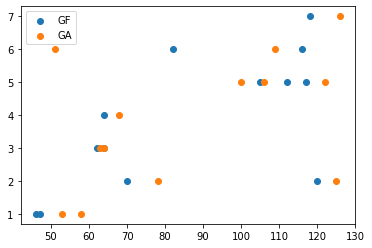

In [43]:
plt.scatter(standings.GF, standings.W, label = "GF")
plt.scatter(standings.GA, standings.W, label = "GA")
plt.legend()

There is not a lot of points to show a clear linear relationship, but we can assume one 

In [45]:
X = standings.drop(['Team', 'W', 'L', 'year'], axis=1)
y = standings.W
# display(X)
# display(y)
num_wins_regr = linear_model.LinearRegression().fit(X, y)
regr_str = f"num wins = {num_wins_regr.intercept_} + {num_wins_regr.coef_[0]} * goals for + {num_wins_regr.coef_[1]} * goals against"
print(regr_str)


,GF,GA
0,118,126
1,116,109
2,105,100
3,112,106
4,117,122
5,120,125
6,82,51
7,64,68
8,64,64
9,62,63


0     7
1     6
2     5
3     5
4     5
5     2
6     6
7     4
8     3
9     3
10    2
11    1
12    1
Name: W, dtype: int64

num wins = 0.23934875786387577 + 0.11737905105296058 * goals for + -0.07562618716358424 * goals against


By this analysis scoring goals is more important than stopping goals. Each goal scored will have a greater impact on the number of wins than each goal scoared against

graph each data point avaliable against number of wins. see which ones have an effect on winning and do a hypothesis test
